In [1]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import *

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [2]:
jdbcUsername = dbutils.secrets.get(scope = "key-vault-secrets", key = "username")
jdbcPassword = dbutils.secrets.get(scope = "key-vault-secrets", key = "password")

In [3]:
jdbcHostname = "newsignature.database.windows.net"
jdbcDatabase = "NewSignature"
jdbcPort = 1433
jdbcUrl = "jdbc:sqlserver://{0}:{1};database={2}".format(jdbcHostname, jdbcPort, jdbcDatabase)
connectionProperties = {
  "user" : jdbcUsername,
  "password" : jdbcPassword,
  "driver" : "com.microsoft.sqlserver.jdbc.SQLServerDriver"
}

In [4]:
pushdown_query = "(SELECT SeriousDlqin2yrs,cast(age as int) as age,cast([NumberOfTime30-59DaysPastDueNotWorse] as int) as NumberOfTime3059DaysPastDueNotWorse ,cast(DebtRatio as float) as DebtRatio,cast(NumberOfTimes90DaysLate as int) as NumberOfTimes90DaysLate,cast([NumberOfTime60-89DaysPastDueNotWorse] as int)as NumberOfTime6089DaysPastDueNotWorse from CreditData)cralias"
df = spark.read.jdbc(url=jdbcUrl,table=pushdown_query, properties=connectionProperties)
display(df)

SeriousDlqin2yrs,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime6089DaysPastDueNotWorse
0,65,0,0.209547787,0,0
1,45,2,0.802982129,0,0
0,34,0,0.43091515,0,0
0,40,0,0.121876201,0,0
0,64,0,0.421830005,0,0
0,61,0,0.826185102,0,0
0,53,2,0.004736344,3,0
0,76,0,0.124238508,0,0
0,39,0,0.914618909,0,0
0,52,0,0.229233173,0,0


In [5]:
creditdf=df.toPandas()

In [6]:
X = creditdf.iloc[:,1:]
Y = creditdf.iloc[:,0:1]
#Y=pd.DataFrame(Y.reshape(Y.values.shape[0],1))
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(Y.shape))

Shape of X: (112994, 5)
Shape of y: (112994, 1)

In [7]:
df.groupby("SeriousDlqin2yrs").count().show()

+----------------+------+
SeriousDlqin2yrs| count|
+----------------+------+
 0|105371|
 1| 7623|
+----------------+------+

In [8]:
total_count = df.count()
unique_count=df.dropDuplicates().count()
print (total_count-unique_count)

2246

In [9]:
df.dropDuplicates().dropna().count()

Out[ 10 ]: 110748

In [10]:
CleansedData = df.dropDuplicates().dropna()
CleansedData.describe().show()

+-------+-------------------+------------------+-----------------------------------+-------------------+-----------------------+-----------------------------------+
summary| SeriousDlqin2yrs| age|NumberOfTime3059DaysPastDueNotWorse| DebtRatio|NumberOfTimes90DaysLate|NumberOfTime6089DaysPastDueNotWorse|
+-------+-------------------+------------------+-----------------------------------+-------------------+-----------------------+-----------------------------------+
 count| 110748| 110748| 110748| 110748| 110748| 110748|
 mean|0.06804637555531477| 51.39931195145736| 0.3388323039693719|0.31190691208948235| 0.1702152634810561| 0.14529382020442808|
 stddev| 0.2518266049292172|14.295470658411551| 2.8424078999062985|0.22101927066997876| 2.79922236703278| 2.7768800563225793|
 min| 0| 0| 0| 0.0| 0| 0|
 max| 1| 103| 98| 0.999909437| 98| 98|
+-------+-------------------+------------------+-----------------------------------+-------------------+-----------------------+-----------------------------------+

In [11]:
CleansedData.registerTempTable("test_data")
display(sqlContext.sql("select * from test_data"))

SeriousDlqin2yrs,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime6089DaysPastDueNotWorse
0,55,0,0.301315206,0,0
0,45,0,0.250593676,0,0
0,53,1,0.26746538,0,0
1,40,3,0.382964747,3,1
0,39,2,0.577220789,0,0
0,29,0,0.346627566,0,0
0,63,0,0.202268137,0,0
0,54,0,0.092913547,0,0
0,78,1,0.009463722,0,0
0,47,0,0.020146833,0,0


In [12]:
CleansedData1 = CleansedData.filter("NumberOfTime3059DaysPastDueNotWorse<5")
print(CleansedData1.count())
CleansedData2 = CleansedData1.filter("NumberOfTimes90DaysLate<5")
print(CleansedData2.count())
CleansedData3 = CleansedData2.filter("NumberOfTime6089DaysPastDueNotWorse<5")
print(CleansedData3.count())
CleansedData4 = CleansedData3.filter("DebtRatio<1")
print(CleansedData4.count())


110231
110016
109983
109983

In [13]:
splits = CleansedData4.randomSplit([0.7, 0.3])
train = splits[0]
test = splits[1]
train_rows = train.count()
test_rows = test.count()
print ("Training Rows:", train_rows, " Testing Rows:", test_rows)

Training Rows: 76883 Testing Rows: 33100

In [14]:
from pyspark.sql.functions import rand


pos = train.filter("SeriousDlqin2yrs = 1")
neg = train.filter("SeriousDlqin2yrs = 0")

# undersample the most prevalent class to get a roughly even distribution
posCount = pos.count()
negCount = neg.count()


if posCount < negCount:
  pos = pos.sample(True, negCount/posCount)
else:
  neg = neg.sample(True, posCount/negCount)
  
# shuffle into random order (so a sample of the first 1000 has a mix of classes)
train = neg.union(pos).orderBy(rand())

#CleansedData4.createOrReplaceTempView("CreditCleansedData")

# Show the statistics
train.describe().show()


+-------+------------------+------------------+-----------------------------------+-------------------+-----------------------+-----------------------------------+
summary| SeriousDlqin2yrs| age|NumberOfTime3059DaysPastDueNotWorse| DebtRatio|NumberOfTimes90DaysLate|NumberOfTime6089DaysPastDueNotWorse|
+-------+------------------+------------------+-----------------------------------+-------------------+-----------------------+-----------------------------------+
 count| 144258| 144258| 144258| 144258| 144258| 144258|
 mean| 0.501830054485713| 48.89057799220841| 0.5293848521399159|0.33292423864194703| 0.28628568259645915| 0.20211010827822373|
 stddev|0.4999983838929065|13.947773839714449| 0.9391975001670626|0.23326883394131784| 0.7289505669286634| 0.5600512608448545|
 min| 0| 0| 0| 0.0| 0| 0|
 max| 1| 102| 4| 0.999875016| 4| 4|
+-------+------------------+------------------+-----------------------------------+-------------------+-----------------------+-----------------------------------+

In [15]:
train_res=train
train_res.groupby("SeriousDlqin2yrs").count().show()

+----------------+-----+
SeriousDlqin2yrs|count|
+----------------+-----+
 0|71865|
 1|72393|
+----------------+-----+

In [16]:
# Carrier is a string, and we need our features to be numeric - so we'll generate a numeric index for each distinct carrier string, and transform the dataframe to add that as a column
#carrierIndexer = StringIndexer(inputCol="SeriousDlqin2yrs", outputCol="SeriousDlqin2yrsIdx")
#numTrain = carrierIndexer.fit(train_res).transform(train_res)


numericCols = ["age","NumberOfTime3059DaysPastDueNotWorse","DebtRatio","NumberOfTimes90DaysLate","NumberOfTime6089DaysPastDueNotWorse"]
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")
training = assembler.transform(train_res).select(col("features"), col("SeriousDlqin2yrs").alias("label").cast(IntegerType()))



In [17]:
lr = LogisticRegression(labelCol="label",featuresCol="features",maxIter=10,regParam=0.3)
model = lr.fit(training)
print ("Model trained!")

Model trained!

In [18]:
testing = assembler.transform(test).select(col("features"),  col("SeriousDlqin2yrs").alias("trueLabel").cast(IntegerType()))
testing.show()

+--------------------+---------+
 features|trueLabel|
+--------------------+---------+
(5,[0,2],[26.0,0....| 0|
(5,[0,2],[26.0,0....| 0|
(5,[0,2],[26.0,0....| 0|
(5,[0,2],[26.0,0....| 0|
(5,[0,2],[26.0,0....| 0|
(5,[0,2],[27.0,0....| 0|
(5,[0,2],[27.0,0....| 0|
(5,[0,2],[27.0,0....| 0|
(5,[0,2],[27.0,0....| 0|
(5,[0,2],[28.0,0....| 0|
[28.0,4.0,0.09853...| 0|
(5,[0,2],[29.0,0....| 0|
(5,[0,2],[29.0,0....| 0|
(5,[0,2],[30.0,0....| 0|
(5,[0,2],[30.0,0....| 0|
(5,[0,2],[31.0,0....| 0|
(5,[0,2],[31.0,0....| 0|
(5,[0,2],[31.0,0....| 0|
[31.0,4.0,0.83734...| 0|
(5,[0,2],[32.0,0....| 0|
+--------------------+---------+
only showing top 20 rows

In [19]:
prediction = model.transform(testing)
predicted = prediction.select("features", "probability", col("prediction").cast("Int"), "trueLabel")
predicted.show(100, truncate=False)

+------------------------------+----------------------------------------+----------+---------+
features |probability |prediction|trueLabel|
+------------------------------+----------------------------------------+----------+---------+
(5,[0,2],[26.0,0.00599952]) |[0.5359945225644714,0.4640054774355286] |0 |0 |
(5,[0,2],[26.0,0.13462669]) |[0.5247605792419808,0.47523942075801917]|0 |0 |
(5,[0,2],[26.0,0.144268775]) |[0.523917313022173,0.4760826869778269] |0 |0 |
(5,[0,2],[26.0,0.197046608]) |[0.5192992409037486,0.48070075909625143]|0 |0 |
(5,[0,2],[26.0,0.299104353]) |[0.510360501364911,0.489639498635089] |0 |0 |
(5,[0,2],[27.0,0.043536206]) |[0.5356922609827784,0.46430773901722144]|0 |0 |
(5,[0,2],[27.0,0.082458771]) |[0.5322959162888008,0.46770408371119915]|0 |0 |
(5,[0,2],[27.0,0.095444238]) |[0.531162135402591,0.468837864597409] |0 |0 |
(5,[0,2],[27.0,0.308633583]) |[0.5125108115254524,0.48748918847454753]|0 |0 |
(5,[0,2],[28.0,0.012387188]) |[0.5413757194927563,0.4586242805072436] |0 |0 |
[28.0,4.0,0.098537683,1.0,1.0]|[0.14580445724590993,0.85419554275409] |1 |0 |
(5,[0,2],[29.0,0.274261227]) |[0.5214870492877418,0.4785129507122582] |0 |0 |
(5,[0,2],[29.0,0.346627566]) |[0.5151516861198783,0.48484831388012173]|0 |0 |
(5,[0,2],[30.0,0.130566495]) |[0.5370161948503289,0.46298380514967113]|0 |0 |
(5,[0,2],[30.0,0.237920693]) |[0.5276446627720516,0.4723553372279483] |0 |0 |
(5,[0,2],[31.0,0.063466821]) |[0.5458241743331946,0.45417582566680537]|0 |0 |
(5,[0,2],[31.0,0.1825054]) |[0.5354580362203409,0.4645419637796591] |0 |0 |
(5,[0,2],[31.0,0.199367958]) |[0.5339869172709609,0.4660130827290391] |0 |0 |
[31.0,4.0,0.83734741,1.0,0.0] |[0.1647837539990212,0.8352162460009788] |1 |0 |
(5,[0,2],[32.0,0.366526695]) |[0.5223574038328617,0.4776425961671384] |0 |0 |
(5,[0,2],[34.0,0.048829264]) |[0.5559613214448788,0.44403867855512125]|0 |0 |
(5,[0,2],[34.0,0.136993899]) |[0.5483166063987774,0.45168339360122256]|0 |0 |
(5,[0,2],[34.0,0.604052793]) |[0.5075227589372028,0.4924772410627972] |0 |0 |
[34.0,1.0,0.096829477,0.0,1.0]|[0.3881842913628371,0.6118157086371628] |1 |0 |
(5,[0,2],[35.0,0.004945055]) |[0.5626988945717349,0.43730110542826495]|0 |0 |
[36.0,0.0,0.106276151,0.0,1.0]|[0.46517453856150803,0.534825461438492] |1 |0 |
(5,[0,2],[36.0,0.224265323]) |[0.546654750684317,0.4533452493156829] |0 |0 |
(5,[0,2],[37.0,0.054259876]) |[0.5643227302326139,0.4356772697673861] |0 |0 |
(5,[0,2],[37.0,0.148212947]) |[0.5562062167999209,0.4437937832000792] |0 |0 |
(5,[0,2],[38.0,0.29190162]) |[0.5466986865977342,0.4533013134022657] |0 |0 |
(5,[0,2],[38.0,0.310768726]) |[0.5450586367362225,0.4549413632637775] |0 |0 |
(5,[0,2],[39.0,0.250099987]) |[0.5532834343631609,0.44671656563683915]|0 |0 |
(5,[0,2],[39.0,0.287549407]) |[0.5500355040255815,0.4499644959744184] |0 |0 |
(5,[0,2],[39.0,0.337624983]) |[0.545685900884573,0.45431409911542686] |0 |0 |
[39.0,1.0,0.293391287,0.0,0.0]|[0.47599957617916866,0.5240004238208312]|1 |0 |
(5,[0,2],[40.0,0.154579601]) |[0.564485934766695,0.435514065233305] |0 |0 |
(5,[0,2],[41.0,0.299092121]) |[0.5549425246016036,0.44505747539839635]|0 |0 |
[41.0,1.0,0.377036387,0.0,0.0]|[0.4746438050537073,0.5253561949462927] |1 |0 |
[42.0,2.0,0.447857855,1.0,0.0]|[0.31748006911163196,0.682519930888368] |1 |0 |
(5,[0,2],[44.0,0.015364355]) |[0.5880704454507506,0.4119295545492494] |0 |0 |
[44.0,0.0,0.046500814,1.0,0.0]|[0.497234868170273,0.5027651318297269] |1 |0 |
(5,[0,2],[45.0,0.185319606]) |[0.5764813487320423,0.42351865126795774]|0 |0 |
(5,[0,2],[45.0,0.382747786]) |[0.5594956912490014,0.44050430875099855]|0 |0 |
(5,[0,2],[45.0,0.409638554]) |[0.5571704139718794,0.4428295860281206] |0 |0 |
(5,[0,2],[45.0,0.890274314]) |[0.5152820393996357,0.48471796060036443]|0 |0 |
(5,[0,2],[45.0,0.899504806]) |[0.5144735688356193,0.48552643116438066]|0 |0 |
(5,[0,2],[46.0,0.206566119]) |[0.577578912912264,0.422421087087736] |0 |0 |
(5,[0,2],[46.0,0.419596734]) |[0.5592555928457887,0.44074440715421126]|0 |0 |
(5,[0,2],[46.0,0.461221431]) |

In [20]:
tp = float(predicted.filter("prediction == 1.0 AND truelabel == 1").count())
fp = float(predicted.filter("prediction == 1.0 AND truelabel == 0").count())
tn = float(predicted.filter("prediction == 0.0 AND truelabel == 0").count())
fn = float(predicted.filter("prediction == 0.0 AND truelabel == 1").count())
metrics = spark.createDataFrame([
 ("TP", tp),
 ("FP", fp),
 ("TN", tn),
 ("FN", fn),
 ("Precision", tp / (tp + fp)),
 ("Recall", tp / (tp + fn))],["metric", "value"])
metrics.show()

+---------+-------------------+
 metric| value|
+---------+-------------------+
 TP| 1255.0|
 FP| 4133.0|
 TN| 26854.0|
 FN| 858.0|
Precision|0.23292501855976244|
 Recall| 0.5939422621864647|
+---------+-------------------+

In [21]:
prediction.select("rawPrediction", "probability", "prediction","trueLabel").show(100, truncate=False)

+--------------------------------------------+----------------------------------------+----------+---------+
rawPrediction |probability |prediction|trueLabel|
+--------------------------------------------+----------------------------------------+----------+---------+
[0.14422758494792293,-0.14422758494792293] |[0.5359945225644714,0.4640054774355286] |0.0 |0 |
[0.09912339828650607,-0.09912339828650607] |[0.5247605792419808,0.47523942075801917]|0.0 |0 |
[0.09574232100986813,-0.09574232100986813] |[0.523917313022173,0.4760826869778269] |0.0 |0 |
[0.07723533503468821,-0.07723533503468821] |[0.5192992409037486,0.48070075909625143]|0.0 |0 |
[0.0414479381672668,-0.0414479381672668] |[0.510360501364911,0.489639498635089] |0.0 |0 |
[0.14301229320526532,-0.14301229320526532] |[0.5356922609827784,0.46430773901722144]|0.0 |0 |
[0.12936377215717626,-0.12936377215717626] |[0.5322959162888008,0.46770408371119915]|0.0 |0 |
[0.12481031018290079,-0.12481031018290079] |[0.531162135402591,0.468837864597409] |0.0 |0 |
[0.05005369374560226,-0.05005369374560226] |[0.5125108115254524,0.48748918847454753]|0.0 |0 |
[0.16588221467367986,-0.16588221467367986] |[0.5413757194927563,0.4586242805072436] |0.0 |0 |
[-1.7678937502913916,1.7678937502913916] |[0.14580445724590993,0.85419554275409] |1.0 |0 |
[0.08600116479578407,-0.08600116479578407] |[0.5214870492877418,0.4785129507122582] |0.0 |0 |
[0.060625306318454836,-0.060625306318454836]|[0.5151516861198783,0.48484831388012173]|0.0 |0 |
[0.14833617666615978,-0.14833617666615978] |[0.5370161948503289,0.46298380514967113]|0.0 |0 |
[0.11069153451568176,-0.11069153451568176] |[0.5276446627720516,0.4723553372279483] |0.0 |0 |
[0.18381249458117566,-0.18381249458117566] |[0.5458241743331946,0.45417582566680537]|0.0 |0 |
[0.14207062708050827,-0.14207062708050827] |[0.5354580362203409,0.4645419637796591] |0.0 |0 |
[0.13615763091009603,-0.13615763091009603] |[0.5339869172709609,0.4660130827290391] |0.0 |0 |
[-1.6230566360557113,1.6230566360557113] |[0.1647837539990212,0.8352162460009788] |1.0 |0 |
[0.08948928921119903,-0.08948928921119903] |[0.5223574038328617,0.4776425961671384] |0.0 |0 |
[0.22478705358323442,-0.22478705358323442] |[0.5559613214448788,0.44403867855512125]|0.0 |0 |
[0.1938713912548501,-0.1938713912548501] |[0.5483166063987774,0.45168339360122256]|0.0 |0 |
[0.030093306602510306,-0.030093306602510306]|[0.5075227589372028,0.4924772410627972] |0.0 |0 |
[-0.45495090288951784,0.45495090288951784] |[0.3881842913628371,0.6118157086371628] |1.0 |0 |
[0.25212267566554564,-0.25212267566554564] |[0.5626988945717349,0.43730110542826495]|0.0 |0 |
[-0.13952776646048676,0.13952776646048676] |[0.46517453856150803,0.534825461438492] |1.0 |0 |
[0.1871634594121569,-0.1871634594121569] |[0.546654750684317,0.4533452493156829] |0.0 |0 |
[0.2587245422639228,-0.2587245422639228] |[0.5643227302326139,0.4356772697673861] |0.0 |0 |
[0.2257791167228233,-0.2257791167228233] |[0.5562062167999209,0.4437937832000792] |0.0 |0 |
[0.18734074811290435,-0.18734074811290435] |[0.5466986865977342,0.4533013134022657] |0.0 |0 |
[0.18072484051900534,-0.18072484051900534] |[0.5450586367362225,0.4549413632637775] |0.0 |0 |
[0.21394609760474664,-0.21394609760474664] |[0.5532834343631609,0.44671656563683915]|0.0 |0 |
[0.20081414709971884,-0.20081414709971884] |[0.5500355040255815,0.4499644959744184] |0.0 |0 |
[0.18325473001014153,-0.18325473001014153] |[0.545685900884573,0.45431409911542686] |0.0 |0 |
[-0.09607552928796959,0.09607552928796959] |[0.47599957617916866,0.5240004238208312]|1.0 |0 |
[0.25938837449326996,-0.25938837449326996] |[0.564485934766695,0.435514065233305] |0.0 |0 |
[0.2206611170827309,-0.2206611170827309] |[0.5549425246016036,0.44505747539839635]|0.0 |0 |
[-0.10151186046813732,0.10151186046813732] |[0.4746438050537073,0.5253561949462927] |1.0 |0 |
[-0.7653766874887669,0.7653766874887669] |[0.31748006911163196,0.682519930888368] |1.0 |0 |
[0.35599439528459537,-0.35599439528459537] |[0.5880704454507506,0.4119295545492494] |0.0 |0

In [22]:
evaluator = BinaryClassificationEvaluator(labelCol="trueLabel", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator.evaluate(prediction)
print ("AUC = ", auc)

AUC = 0.8063729868796335

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
trainingSummary = model.summary

#print(roc)
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.title('ROC Curve')

%matplotlib inline is not supported in Databricks.
You can display matplotlib figures using display(). For an example, see https://docs.databricks.com/user-guide/visualizations/matplotlib-and-ggplot.html
 Out[ 24 ]: <matplotlib.text.Text at 0x7f6c7d2abc50>

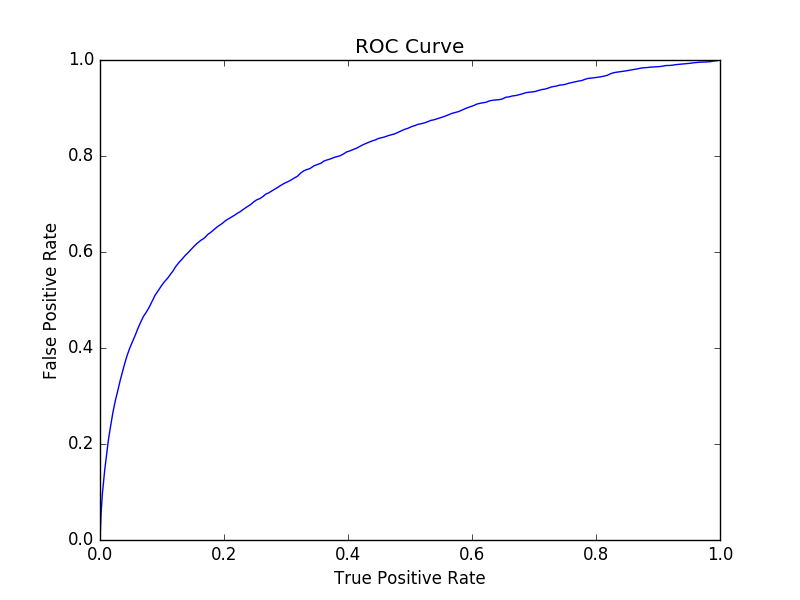

In [24]:
display(plt.show())